In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import json

plt.style.use('seaborn-v0_8')

In [2]:
stan_file = 'two_state.stan'

model = CmdStanModel(stan_file=stan_file)

13:14:02 - cmdstanpy - INFO - compiling stan file /oscar/data/jpober/jmduchar/Research/mcgill25/stan_hmm/two_state.stan to exe file /oscar/data/jpober/jmduchar/Research/mcgill25/stan_hmm/two_state
13:14:26 - cmdstanpy - INFO - compiled model executable: /oscar/data/jpober/jmduchar/Research/mcgill25/stan_hmm/two_state


In [3]:
data_file = "two_state.data.json"

# fit the model
fit = model.sample(
    data=data_file, 
#     show_console=True,
#     iter_sampling=100,
#     iter_warmup=100,
    adapt_delta=0.99,
    chains=4,
)

13:14:26 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

13:14:39 - cmdstanpy - INFO - CmdStan done processing.
13:14:39 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'two_state.stan', line 42, column 2 to column 51)
Consider re-running with show_console=True if the above output is unclear!
13:14:39 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 820 divergent transitions (82.0%)
	Chain 2 had 707 divergent transitions (70.7%)
	Chain 3 had 828 divergent transitions (82.8%)
	Chain 4 had 922 divergent transitions (92.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [4]:
print(fit.diagnose())

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
3277 of 1000 (327.70%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

The following parameters had rank-normalized split R-hat greater than 1.01:
  sigma_clean
Such high values indicate incomplete mixing and biased estimation.
You should consider regularizating your model with additional prior information or a more effective parameterization.

Processing complete.



In [5]:
fit.draws_pd()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,viterbi[45],viterbi[46],viterbi[47],viterbi[48],viterbi[49],viterbi[50],viterbi[51],viterbi[52],viterbi[53],log_p_state
0,1.0,1.0,1.0,511.080,0.999744,0.031887,6.0,63.0,0.0,-507.803,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,-193.814
1,1.0,2.0,2.0,511.402,0.980901,0.031887,5.0,54.0,1.0,-505.744,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,-194.522
2,1.0,3.0,3.0,507.865,0.988595,0.031887,6.0,98.0,1.0,-503.382,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,-196.779
3,1.0,4.0,4.0,504.866,0.999336,0.031887,6.0,63.0,0.0,-501.653,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,-200.887
4,1.0,5.0,5.0,509.085,0.999607,0.031887,6.0,127.0,0.0,-498.388,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,-195.535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.0,996.0,3996.0,510.851,0.992592,0.010456,7.0,135.0,1.0,-506.895,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,-195.237
3996,4.0,997.0,3997.0,512.454,0.990627,0.010456,6.0,107.0,1.0,-504.378,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,-193.936
3997,4.0,998.0,3998.0,512.400,0.988222,0.010456,6.0,85.0,1.0,-508.520,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,-194.205
3998,4.0,999.0,3999.0,508.330,0.994258,0.010456,7.0,175.0,1.0,-505.859,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,-197.555


In [6]:
fit.metric_type

'diag_e'

In [7]:
fit.metric

array([[3.72592e-01, 2.97453e-01, 1.78945e-02, 5.15527e-01, 5.49623e+00,
        1.24078e-01, 1.54997e-02],
       [5.57081e-01, 2.98476e-01, 1.51402e-02, 4.96225e-01, 1.48189e+01,
        2.01000e-01, 1.73665e-02],
       [2.99602e-01, 1.59316e-01, 1.10122e-02, 8.43157e-01, 2.67432e+02,
        1.06642e+00, 1.86123e-02],
       [4.19263e-01, 2.58281e-01, 1.40252e-02, 8.47620e-01, 7.21114e+00,
        1.47769e-01, 2.06922e-02]])

In [8]:
fit.summary()

,Mean,MCSE,StdDev,MAD,5%,50%,95%,ESS_bulk,ESS_tail,R_hat
lp__,510.138000,0.105395,2.043940,1.925900,506.322000,510.448000,512.822000,373.888,863.711,1.00570
theta_clean[1],0.893539,0.003109,0.056673,0.053149,0.787412,0.903856,0.965843,359.649,891.975,1.01301
theta_clean[2],0.106461,0.003109,0.056672,0.053149,0.034157,0.096144,0.212588,359.654,891.975,1.01301
theta_rfi[1],0.153518,0.003693,0.068425,0.069917,0.052806,0.148989,0.275521,325.898,510.835,1.00953
theta_rfi[2],0.846482,0.003693,0.068425,0.069917,0.724479,0.851011,0.947194,325.898,510.835,1.00953
...,...,...,...,...,...,...,...,...,...,...
viterbi[50],1.000000,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
viterbi[51],2.000000,NaN,0.000000,0.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN
viterbi[52],2.000000,NaN,0.000000,0.000000,2.000000,2.000000,2.000000,NaN,NaN,NaN
viterbi[53],1.000000,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN


In [9]:
with open('two_state.data.json') as f:
    input_ = json.load(f)
    
data = np.asarray(input_['y'])

In [10]:
data

array([ 1.46261393e+03,  1.37186619e+03,  9.90214359e+02,  8.27779035e+02,
        8.13133287e+02,  6.50460695e+02,  4.09044235e+02,  2.63330352e+02,
        2.24730523e+02,  2.11834315e+02,  2.02251543e+02,  1.67098254e-01,
        2.02013796e+02,  2.05631636e+02,  2.11585205e+02,  2.15370907e+02,
        2.14226318e+02,  2.09948206e+02,  2.05619344e+02,  2.03018477e+02,
        2.02021144e+02,  2.01902138e+02,  2.01553273e+02,  2.01141682e+02,
        2.33012920e-02, -3.80539844e-01, -2.70747105e-01, -3.01667986e-01,
       -3.53897704e-01, -3.57997679e-01, -1.52812738e-01, -1.42952454e-01,
       -1.00080720e-01,  1.68288029e-02, -1.06277790e-01, -4.05412147e-04,
        1.69266722e-01,  1.51819258e-01,  1.29780011e-01,  1.27687158e-01,
        1.95428292e-02, -2.03518358e-03,  1.05266350e-01,  1.47289631e-01,
        1.07898055e-02,  1.11936121e+00,  1.12977835e+00,  1.24876270e+00,
        1.34052744e+00,  1.31555190e+00,  2.00750163e+02,  2.00716801e+02,
        1.42125289e+00])

In [11]:
viterbi = fit.stan_variable('viterbi')

viterbi.shape

(4000, 53)

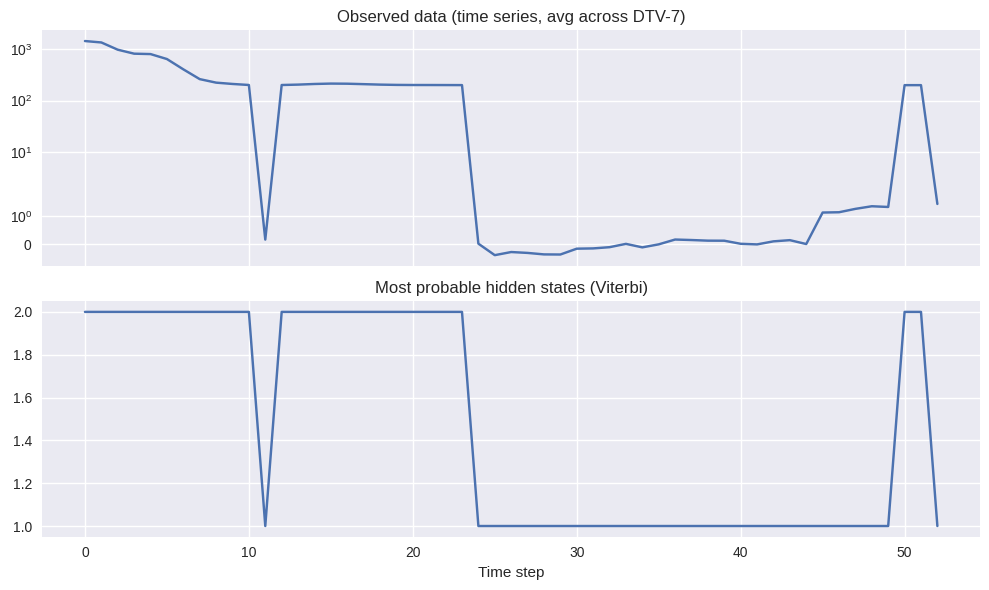

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))

axs[0].plot(data)
axs[0].set_title("Observed data (time series, avg across DTV-7)")
axs[0].set_yscale("symlog")

axs[1].plot(viterbi[-1])
axs[1].set_title("Most probable hidden states (Viterbi)")

plt.xlabel("Time step")
plt.tight_layout()
plt.show()